## Тест Шапиро-Уилка используется для выборки из менее, чем 5000 наблюдений

H0: x взята из генеральной совокупности с нормальным распределением

H1: x взята из генеральной совокупности с другим распределением

In [24]:
import numpy as np
from scipy.stats import norm, t, kstest, shapiro
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [25]:
np.random.seed(17)

In [26]:
# помимо нормального распределения создадим выборку распределения Стьюдента
# с пятью степенями свободы. Напомним, что по форме они очень сильно похожи
x = norm.rvs(size = 250)
y = t.rvs(size = 250, df = 5)

In [27]:
# Проверим принадлежность выборок к нормальному распределению
print(kstest(x, "norm"))
print(kstest(y, "norm"))

KstestResult(statistic=0.057424163162479946, pvalue=0.3702169552013745)
KstestResult(statistic=0.054751982840907654, pvalue=0.43087978272498656)


Как можно заметить, тест Шапиро отвергает нулевую гипотезу выборки *y* в то время, как тест Колмогорова-Смирнова говорит об обратном с *p-value* = 0.43

In [30]:
W, p_val = shapiro(x)
print("Shapiro-Wilk normality test for X")
print("W =", W)
print("P-value =", p_val)

Shapiro-Wilk normality test for X
W = 0.9963920712471008
P-value = 0.8381169438362122


In [31]:
W, p_val = shapiro(y)
print("Shapiro-Wilk normality test for Y")
print("W =", W)
print("P-value =", p_val)

Shapiro-Wilk normality test for Y
W = 0.9189562797546387
P-value = 2.0092326413756467e-10


Можно визуально проверить работу тестов с помощью функции *qqplot*. Она построит график квантилей распределения по оси теоретического нормального распределения. Получиться должна прямая, идущая из левого нижнего угла в верхний правый

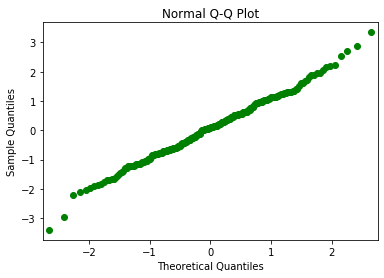

In [32]:
fig = sm.qqplot(x, color="green")
plt.title("Normal Q-Q Plot")
plt.show()

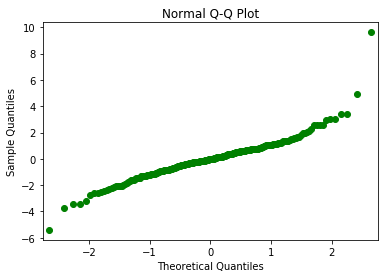

In [33]:
fig = sm.qqplot(y, color="green")
plt.title("Normal Q-Q Plot")
plt.show()